In [119]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import calendar


loading the data set using pandas

In [120]:
uber_data=pd.read_csv('uberdrive.csv')
uber_data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


clearing unwanted null data

In [121]:
print(uber_data.isnull().sum())
uber_data=uber_data.dropna()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64


separat date columns to dat/day of the week/month/time

In [122]:
uber_data['START_DATE*']=pd.to_datetime(uber_data['START_DATE*'])
uber_data['END_DATE*']=pd.to_datetime(uber_data['END_DATE*'])
uber_data['HOUR']=[x.hour for x in uber_data['START_DATE*']]
uber_data['DAY']=[x.day for x in uber_data['START_DATE*']]
uber_data['MONTH']=[x.month for x in uber_data['START_DATE*']]
uber_data['WEEKDAY']=[calendar.day_name[x.dayofweek]for x in uber_data['START_DATE*']]
uber_data['MONTHNAME']=[calendar.month_name[x.month]for x in uber_data['START_DATE*']]
uber_data['DAY_OF_WEEk']=[x.dayofweek for x in uber_data['START_DATE*']]

uber_data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,MONTH,WEEKDAY,MONTHNAME,DAY_OF_WEEk
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,Friday,January,4
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,Saturday,January,5
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,Tuesday,January,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,1,Wednesday,January,2
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,1,Wednesday,January,2


countplot() method of seaborn. This method will count the frequency of every unique value in the column and plot a bar graph.

<AxesSubplot: xlabel='CATEGORY*', ylabel='count'>

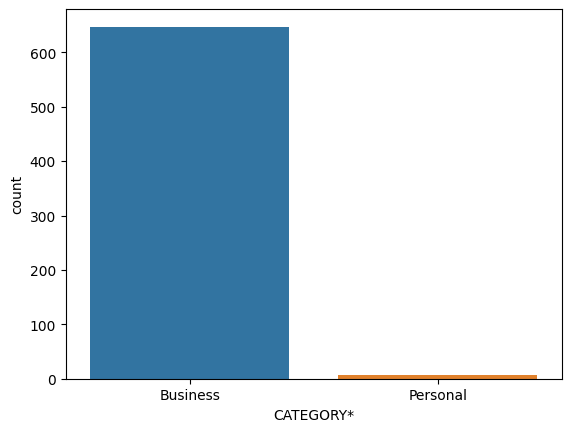

In [123]:
sns.countplot(x='CATEGORY*',data=uber_data)

<AxesSubplot: xlabel='count', ylabel='PURPOSE*'>

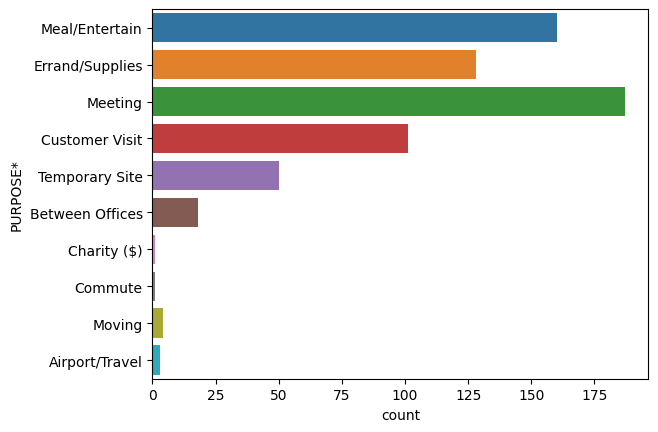

In [124]:
sns.countplot(y='PURPOSE*',data=uber_data)

Plotting the distance column as a histogram

<AxesSubplot: ylabel='Frequency'>

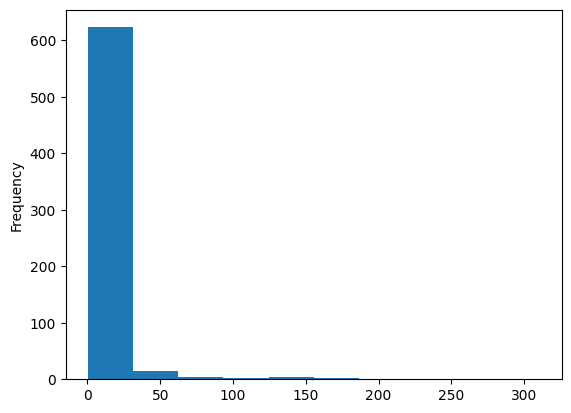

In [125]:
uber_data['MILES*'].plot.hist()

what time of the day the user rides an Uber the most.

<AxesSubplot: >

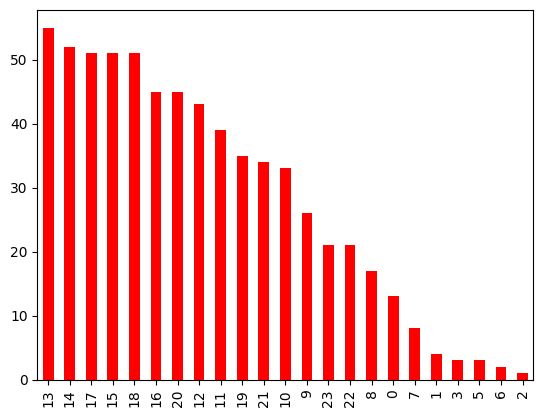

In [126]:
hours=uber_data['HOUR'].value_counts()
hours.plot(kind='bar',color='red')


 the user's travel patterns on different days of the week

Text(0.5, 1.0, 'number of trips vs days')

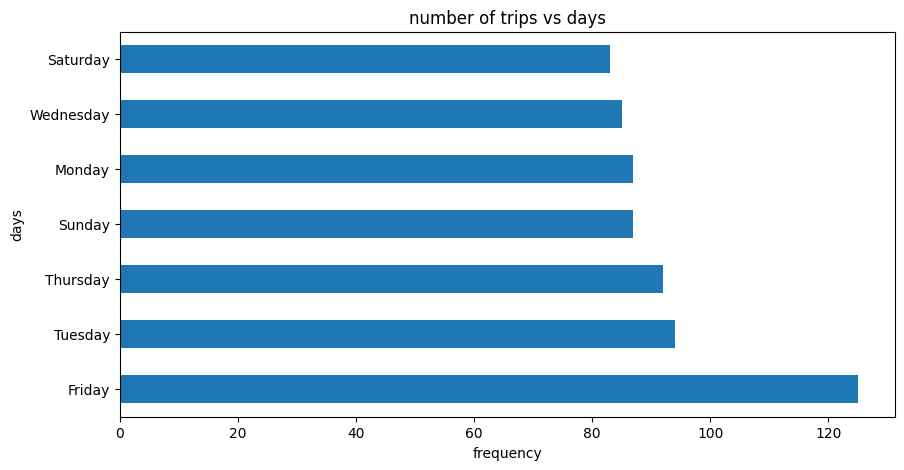

In [127]:
days=uber_data['WEEKDAY'].value_counts()
days.plot(kind='barh',figsize=(10,5))
plt.xlabel('frequency')
plt.ylabel('days')
plt.title('number of trips vs days')

month-wise distribution of Uber trips.

Text(0.5, 1.0, 'number of trips vs month')

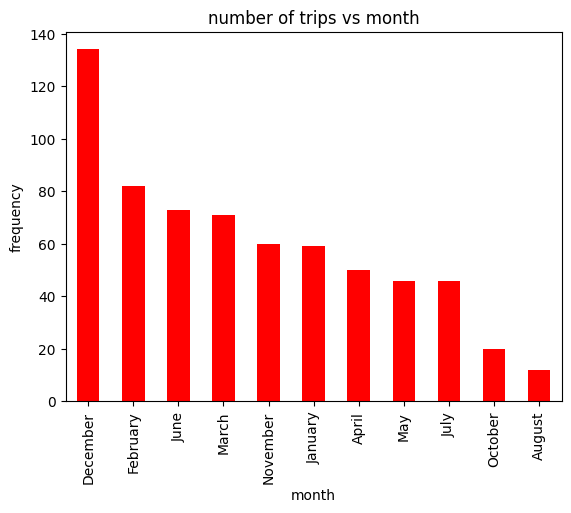

In [128]:
month=uber_data['MONTHNAME'].value_counts()
month.plot(kind='bar',color='red')
plt.ylabel('frequency')
plt.xlabel('month')
plt.title('number of trips vs month')

which days of December the user traveled in an Uber

Text(0.5, 1.0, 'number of trips vs days in december')

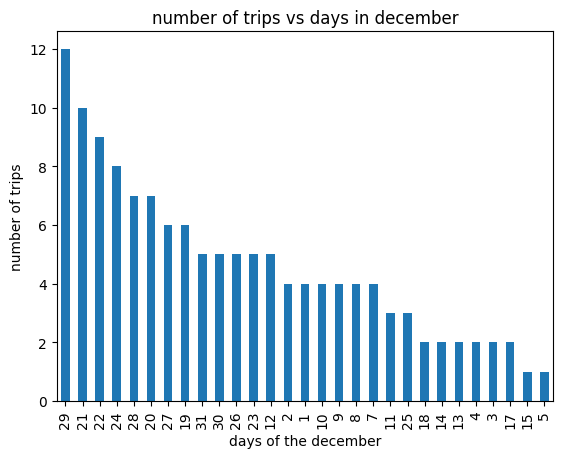

In [129]:
fdec=uber_data['DAY'][uber_data['MONTHNAME']=='December'].value_counts()
fdec.plot(kind='bar')
plt.xlabel('days of the december')
plt.ylabel('number of trips')
plt.title('number of trips vs days in december')

from where people traveled in december

Text(0.5, 1.0, 'number of trips vs pick up spots')

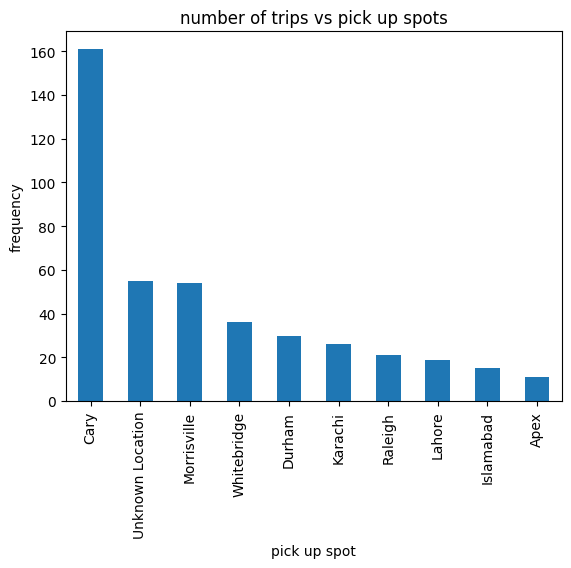

In [130]:
pickup=uber_data['START*'].value_counts().nlargest(10)
pickup.plot(kind='bar')
plt.xlabel('pick up spot')
plt.ylabel('frequency')
plt.title('number of trips vs pick up spots')

Text(0.5, 1.0, 'number of trips vs pick up spots')

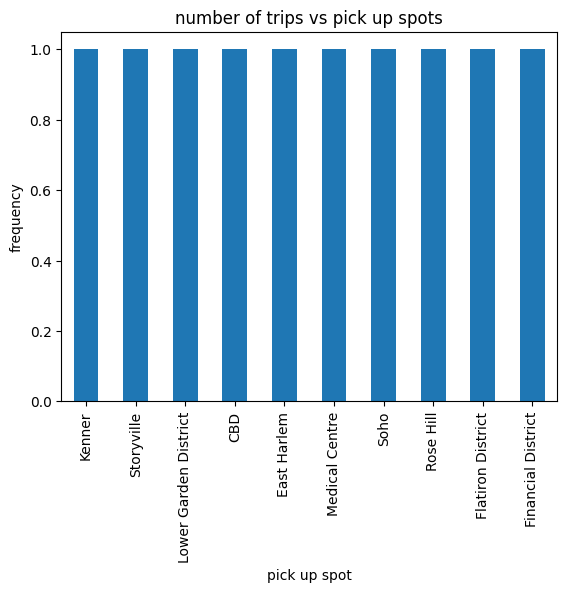

In [131]:
pickupl=uber_data['START*'].value_counts().nsmallest(10)
pickupl.plot(kind='bar')
plt.xlabel('pick up spot')
plt.ylabel('frequency')
plt.title('number of trips vs pick up spots')

end points bar chart

Text(0.5, 1.0, 'number of trips vs endpoint')

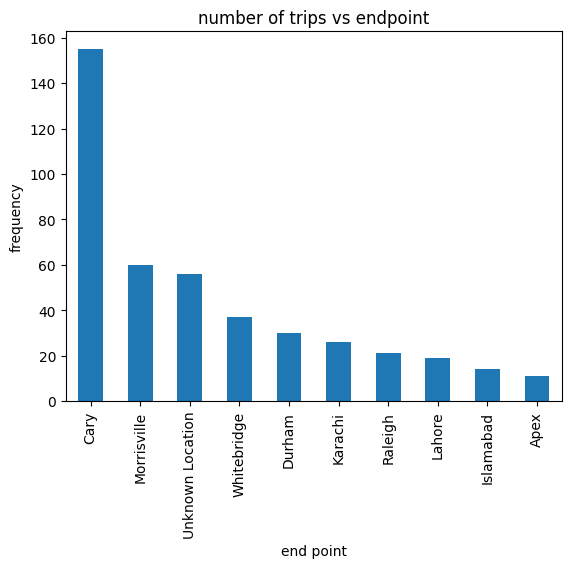

In [132]:
endpoint=uber_data['STOP*'].value_counts().nlargest(10)
endpoint.plot(kind='bar')
plt.xlabel('end point')
plt.ylabel('frequency')
plt.title('number of trips vs endpoint')